In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def specific_heat(temps):
    """
    This function calculates the specific heat of water for a given temperature or an array of temperatures.
    The function takes in a temperature or an array of temperatures in Celsius and returns the specific heat value(s) in J/gC.
    """
    z0 = 4.2184
    z1 = -2.8218 * 10**(-3)
    z2 = 7.3478 * 10**(-5)
    z3 = -9.4712 * 10**(-7)
    z4 = 7.2869 * 10**(-9)
    z5 = -2.8098 * 10**(-11)
    z6 = 4.4008 * 10**(-14)

    return z0 + z1*temps + z2*temps**2 + z3*temps**3 + z4*temps**4 + z5*temps**5 + z6*temps**6

In [6]:
def power(time_data: np.array, temp_data: np.array, water_mass: float) -> np.array:
    """
    This function calculates the power input to the system for all data points.
    The function takes in the time data, temperature data, and mass of water,
    and returns the power input in watts for each time interval.
    """
    
    specific_heat_values = specific_heat(temp_data)[1:]  # J/gC (specific heat of water at the current temperature)

    # Calculate the temperature difference
    temp_diff = np.diff(temp_data)

    # Calculate the time difference
    time_diff = np.diff(time_data)

    # Calculate the heat absorbed
    heat_absorbed = water_mass * specific_heat_values * temp_diff / time_diff

    return heat_absorbed

In [7]:
def energy_stored(temp_data: np.array, water_mass: float) -> float:
    """
    This function calculates the energy stored in the system.
    The function takes in the temperature data and mass of water, and returns the energy stored in the system in J.
    """
    
    specific_heat_values = specific_heat(temp_data)  # J/gC (specific heat of water at the current temperature)
    
    # Calculate the heat absorbed
    energy_harvested = water_mass * np.trapezoid(specific_heat_values, x=temp_data)

    return energy_harvested

In [8]:
# Read the LVM file
data = np.loadtxt('ExpData_SolarCooker_DesignBuild3.lvm', delimiter='\t', skiprows=22)  # Adjust skiprows based on your file's header

# Display the first few rows of the data
print(data[:4])

# Process the data (example: calculate the mean of a column)
mean_value = np.mean(data[:, 1])
print(f'Mean value: {mean_value}')

# Save the processed data to a new text file
# np.savetxt('/path/to/processed_data.txt', data, delimiter='\t')

[[ 0.       22.17564   0.       22.090767  0.       22.170955  0.
  22.104813  0.       23.566219  0.       22.152153  0.       22.179609]
 [ 0.152826 22.206474  0.152826 22.083351  0.152826 22.172355  0.152826
  22.087595  0.152826 23.579745  0.152826 22.154956  0.152826 22.151128]
 [ 0.315763 22.191678  0.315763 22.092538  0.315763 22.14169   0.315763
  22.097178  0.315763 23.582909  0.315763 22.159278  0.315763 22.159733]
 [ 0.465645 22.206009  0.465645 22.080726  0.465645 22.15098   0.465645
  22.116248  0.465645 23.607635  0.465645 22.133249  0.465645 22.207668]]
Mean value: 65.37320481487325


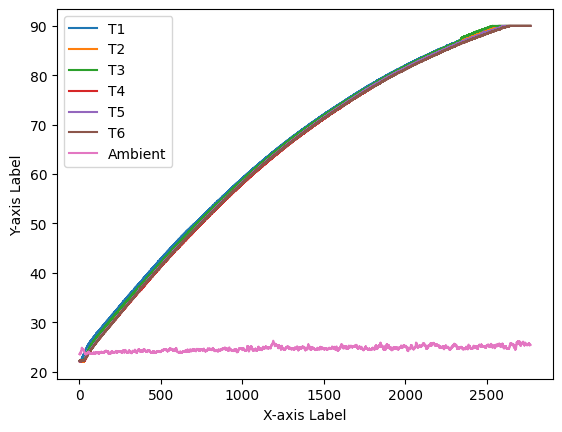

In [9]:
import matplotlib.pyplot as plt

# Plot the data
plt.plot(data[:, 0], data[:, 1], label='T1')
plt.plot(data[:, 0], data[:, 3], label='T2')
plt.plot(data[:, 0], data[:, 5], label='T3')
plt.plot(data[:, 0], data[:, 7], label='T4')
plt.plot(data[:, 0], data[:, 11], label='T5')
plt.plot(data[:, 0], data[:, 13], label='T6')
plt.plot(data[:, 0], data[:, 9], label='Ambient')

# Add labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()
plt.show()

In [10]:
from statsmodels.nonparametric.smoothers_lowess import lowess

window = 100
N = data.shape[0]
print(f'Number of data points: {N}')
frac = window / N  # Equivalent to MATLAB window parameter
print(f'Fraction: {frac}')
# Apply the LOWESS smoothing
smoothed_data = lowess(data[:, 1], data[:, 0], frac=frac)

Number of data points: 18382
Fraction: 0.00544010445000544


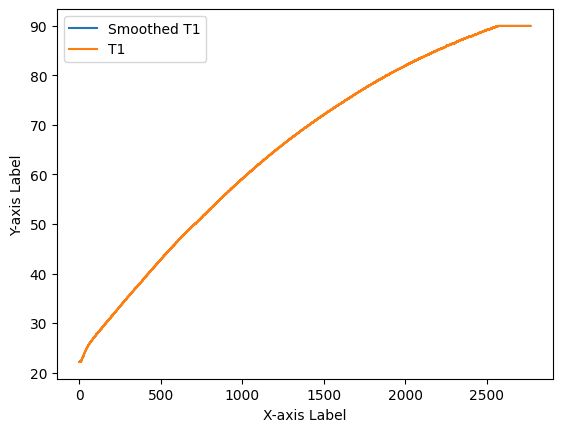

In [11]:
# Plot the smoothed data
plt.plot(smoothed_data[:, 0], smoothed_data[:, 1], label='Smoothed T1')
plt.plot(data[:, 0], data[:, 1], label='T1')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()

# Zoom into a section of the graph
#plt.xlim(400, 500)  # Adjust the range as needed
#plt.ylim(39, 43)  # Adjust the range as needed
plt.show()

In [12]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data[:, 0], y=data[:, 1], mode='lines', name='T1'))
fig.add_trace(go.Scatter(x=smoothed_data[:, 0], y=smoothed_data[:, 1], mode='lines', name='Smoothed T1'))
fig.show()